# Pizzeria Sales Report

## Table of Contents

- [Problem Statement](#Problem-Statement)
- [Project Data](#Project-Data)
- [Power Query Transformations](#Power-Query-Transformations)
- [DAX Calculations](#DAX-Calculations)
- [Power BI Sales Report](#Power-BI-Sales-Report)

##  Problem Statement
Generate a comprehensive sales report using Power BI to analyze the sales data of a pizzeria restaurant and provide actionable recommendations to increase profits.

## Project Data

**The data used was made available on Maven Analytics Data Playground as CSV formatted files**
- Source: Vincent Arel-Bundock (Rdatasets)
- License: Public Domain
- [Download Link](https://mavenanalytics.io/data-playground?search=Pizza%20Place%20Sales)

| Table | Field | Description |
|:---:|:---:|:---|
| orders | order_id | Unique identifier for each order placed by a table |
| orders | date | Date the order was placed (entered into the system prior to cooking & serving) |
| orders | time | Time the order was placed (entered into the system prior to cooking & serving) |
| order_details | order_details_id | Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases) |
| order_details | order_id | Foreign key that ties the details in each order to the order itself |
| order_details | pizza_id | Foreign key that ties the pizza ordered to its details, like size and price |
| order_details | quantity | Quantity ordered for each pizza of the same type and size |
| pizzas | pizza_id | Unique identifier for each pizza (constituted by its type and size) |
| pizzas | pizza_type_id | Foreign key that ties each pizza to its broader pizza type |
| pizzas | size | Size of the pizza (Small, Medium, Large, X Large, or XX Large) |
| pizzas | price | Price of the pizza in USD |
| pizza_types | pizza_type_id | Unique identifier for each pizza type |
| pizza_types | name | Name of the pizza as shown in the menu |
| pizza_types | category | Category that the pizza falls under in the menu (Classic, Chicken, Supreme, or Veggie) |
| pizza_types | ingredients | Comma-delimited ingredients used in the pizza as shown in the menu |


## Power Query Transformations

**Order Details**
```
let
    Source = Csv.Document(File.Contents("C:\Portfolio Projects\Projects Files\Power BI\Raw Data\pizza_sales\order_details.csv"),[Delimiter=",", Columns=4, Encoding=1252, QuoteStyle=QuoteStyle.None]),
    #"Promoted Headers" = Table.PromoteHeaders(Source, [PromoteAllScalars=true]),
    #"Renamed Columns" = Table.RenameColumns(#"Promoted Headers",{{"order_details_id", "Order details ID"}, {"order_id", "Order ID"}, {"pizza_id", "Pizza ID"}, {"quantity", "Quantity"}}),
    #"Changed Type" = Table.TransformColumnTypes(#"Renamed Columns",{{"Order details ID", Int64.Type}, {"Order ID", Int64.Type}, {"Pizza ID", type text}, {"Quantity", Int64.Type}})
in
    #"Changed Type"
```

**Orders**
```
let
    Source = Csv.Document(File.Contents("C:\Portfolio Projects\Projects Files\Power BI\Raw Data\pizza_sales\orders.csv"),[Delimiter=",", Columns=3, Encoding=1252, QuoteStyle=QuoteStyle.None]),
    #"Promoted Headers" = Table.PromoteHeaders(Source, [PromoteAllScalars=true]),
    #"Renamed Columns" = Table.RenameColumns(#"Promoted Headers",{{"order_id", "Order ID"}, {"date", "Order Date"}, {"time", "Order Time"}}),
    #"Changed Type" = Table.TransformColumnTypes(#"Renamed Columns",{{"Order ID", Int64.Type}, {"Order Date", type date}, {"Order Time", type time}})
in
    #"Changed Type"
```

**Pizza Types**
```
let
    Source = Csv.Document(File.Contents("C:\Portfolio Projects\Projects Files\Power BI\Raw Data\pizza_sales\pizza_types.csv"),[Delimiter=",", Columns=4, Encoding=1252, QuoteStyle=QuoteStyle.None]),
    #"Promoted Headers" = Table.PromoteHeaders(Source, [PromoteAllScalars=true]),
    #"Renamed Columns" = Table.RenameColumns(#"Promoted Headers",{{"pizza_type_id", "Pizza type ID"}, {"name", "Name"}, {"category", "Category"}, {"ingredients", "Ingredients"}}),
    #"Changed Type" = Table.TransformColumnTypes(#"Renamed Columns",{{"Pizza type ID", type text}, {"Name", type text}, {"Category", type text}, {"Ingredients", type text}}),
    #"Replaced Value" = Table.ReplaceValue(#"Changed Type","‘Nduja Salami","Nduja Salami",Replacer.ReplaceText,{"Ingredients"})
in
    #"Replaced Value"
```

**Pizzas**
```
let
    Source = Csv.Document(File.Contents("C:\Portfolio Projects\Projects Files\Power BI\Raw Data\pizza_sales\pizzas.csv"),[Delimiter=",", Columns=4, Encoding=1252, QuoteStyle=QuoteStyle.None]),
    #"Promoted Headers" = Table.PromoteHeaders(Source, [PromoteAllScalars=true]),
    #"Renamed Columns" = Table.RenameColumns(#"Promoted Headers",{{"pizza_id", "Pizza ID"}, {"pizza_type_id", "Pizza type ID"}, {"size", "Size"}, {"price", "Price"}}),
    #"Changed Type" = Table.TransformColumnTypes(#"Renamed Columns",{{"Pizza ID", type text}, {"Pizza type ID", type text}, {"Size", type text}, {"Price", type number}})
in
    #"Changed Type"
```

**Day of the Week**
```
let
    Source = Table.FromRows(Json.Document(Binary.Decompress(Binary.FromText("i45WMlTSUfLNz0tJrFSK1YlWMgJyQ0pTi2F8YyA/PDUlDyFiAlKRUVoEFzAFCrgVZcK4ZkBucGJJaRFMwBwkUAqxIRYA", BinaryEncoding.Base64), Compression.Deflate)), let _t = ((type nullable text) meta [Serialized.Text = true]) in type table [#"Day of Week" = _t, #"Day Name" = _t]),
    #"Changed Type" = Table.TransformColumnTypes(Source,{{"Day of Week", Int64.Type}, {"Day Name", type text}})
in
    #"Changed Type"
```

**Pizza Ingredients**
```
let
    Source = Csv.Document(File.Contents("C:\Portfolio Projects\Projects Files\Power BI\Raw Data\pizza_sales\pizza_types.csv"),[Delimiter=",", Columns=4, Encoding=1252, QuoteStyle=QuoteStyle.None]),
    #"Promoted Headers" = Table.PromoteHeaders(Source, [PromoteAllScalars=true]),
    #"Renamed Columns" = Table.RenameColumns(#"Promoted Headers",{{"pizza_type_id", "Pizza type ID"}, {"name", "Name"}, {"category", "Category"}, {"ingredients", "Ingredients"}}),
    #"Changed Type" = Table.TransformColumnTypes(#"Renamed Columns",{{"Pizza type ID", type text}, {"Name", type text}, {"Category", type text}, {"Ingredients", type text}}),
    #"Replaced Value" = Table.ReplaceValue(#"Changed Type","‘Nduja Salami","Nduja Salami",Replacer.ReplaceText,{"Ingredients"}),
    #"Split Column by Delimiter" = Table.SplitColumn(#"Replaced Value", "Ingredients", Splitter.SplitTextByDelimiter(", ", QuoteStyle.Csv), {"Ingredients.1", "Ingredients.2", "Ingredients.3", "Ingredients.4", "Ingredients.5", "Ingredients.6", "Ingredients.7", "Ingredients.8"}),
    #"Unpivoted Columns" = Table.UnpivotOtherColumns(#"Split Column by Delimiter", {"Pizza type ID", "Name", "Category"}, "Attribute", "Value"),
    #"Removed Columns" = Table.RemoveColumns(#"Unpivoted Columns",{"Attribute"}),
    #"Renamed Columns1" = Table.RenameColumns(#"Removed Columns",{{"Value", "Ingredient"}})
in
    #"Renamed Columns1"
```

## DAX Calculations

**DATE TABLE**
```
Date Table = CALENDAR(DATE(2015,01,01),DATE(2015,12,31))
Day = DAY('Date Table'[Date])
Day Name = FORMAT('Date Table'[Date],"DDDD")
Month = FORMAT('Date Table'[Date], "M")
Month Name = FORMAT('Date Table'[Date], "MMMM")
Quarter = QUARTER('Date Table'[Date])
Year = YEAR('Date Table'[Date])
```

**TIME TABLE**
```
Time Table = GENERATESERIES(1,24,1)
Time = TIME('Time Table'[Key],0,0)
Hour = FORMAT('Time Table'[Time], "HH")
```

**Orders TABLE**
```
% Orders < Avg Order Value = (CALCULATE(COUNTROWS('Orders'), Orders[Order Price] < AVERAGE('Orders'[Order Price])) / [Total Orders])

Average Order Cost = DIVIDE(
    SUMX('Order Details', 'Order Details'[Quantity] * RELATED(Pizzas[Price])),
    DISTINCTCOUNT('Orders'[Order ID])
)

Order Hour = FORMAT('Orders'[Order Time], "HH")

Order Price = SUMX(RELATEDTABLE('Order Details'), 'Order Details'[Quantity] * RELATED('Pizzas'[Price]))

Order Value = SUMX('Order Details', 'Order Details'[Quantity] * RELATED('Pizzas'[Price]))

Total Orders = 
    CALCULATE(
        DISTINCTCOUNT('Orders'[Order ID])
    )

Total Pizzas Ordered = SUM('Order Details'[Quantity])
```

**Pizzas TABLE**
```
Total Pizza Ordered by Types = SUMX('Order Details', 'Order Details'[Quantity])

Total Revenue by Pizza Type = SUMX('Order Details', 'Order Details'[Quantity] * RELATED('Pizzas'[Price]))
```

## Power BI Sales Report

Please note, the project was built on a **Power BI Trial License**. Which is why I have opted to include the report screenshots.
- View Live Report on Power BI Online < No Login Required > [External Link](https://app.powerbi.com/view?r=eyJrIjoiYTY3ZmMwNGYtODkyYy00ZWFjLTg5ODItZDllOTdlNDgyNjA3IiwidCI6ImEzNTFhNzc5LWQ4OTYtNDkzNi05OTJhLTg0MzNhNjljMzQ5OCJ9)
	- **The link is functional until the Power BI Trial License expires.**

### Screenshots

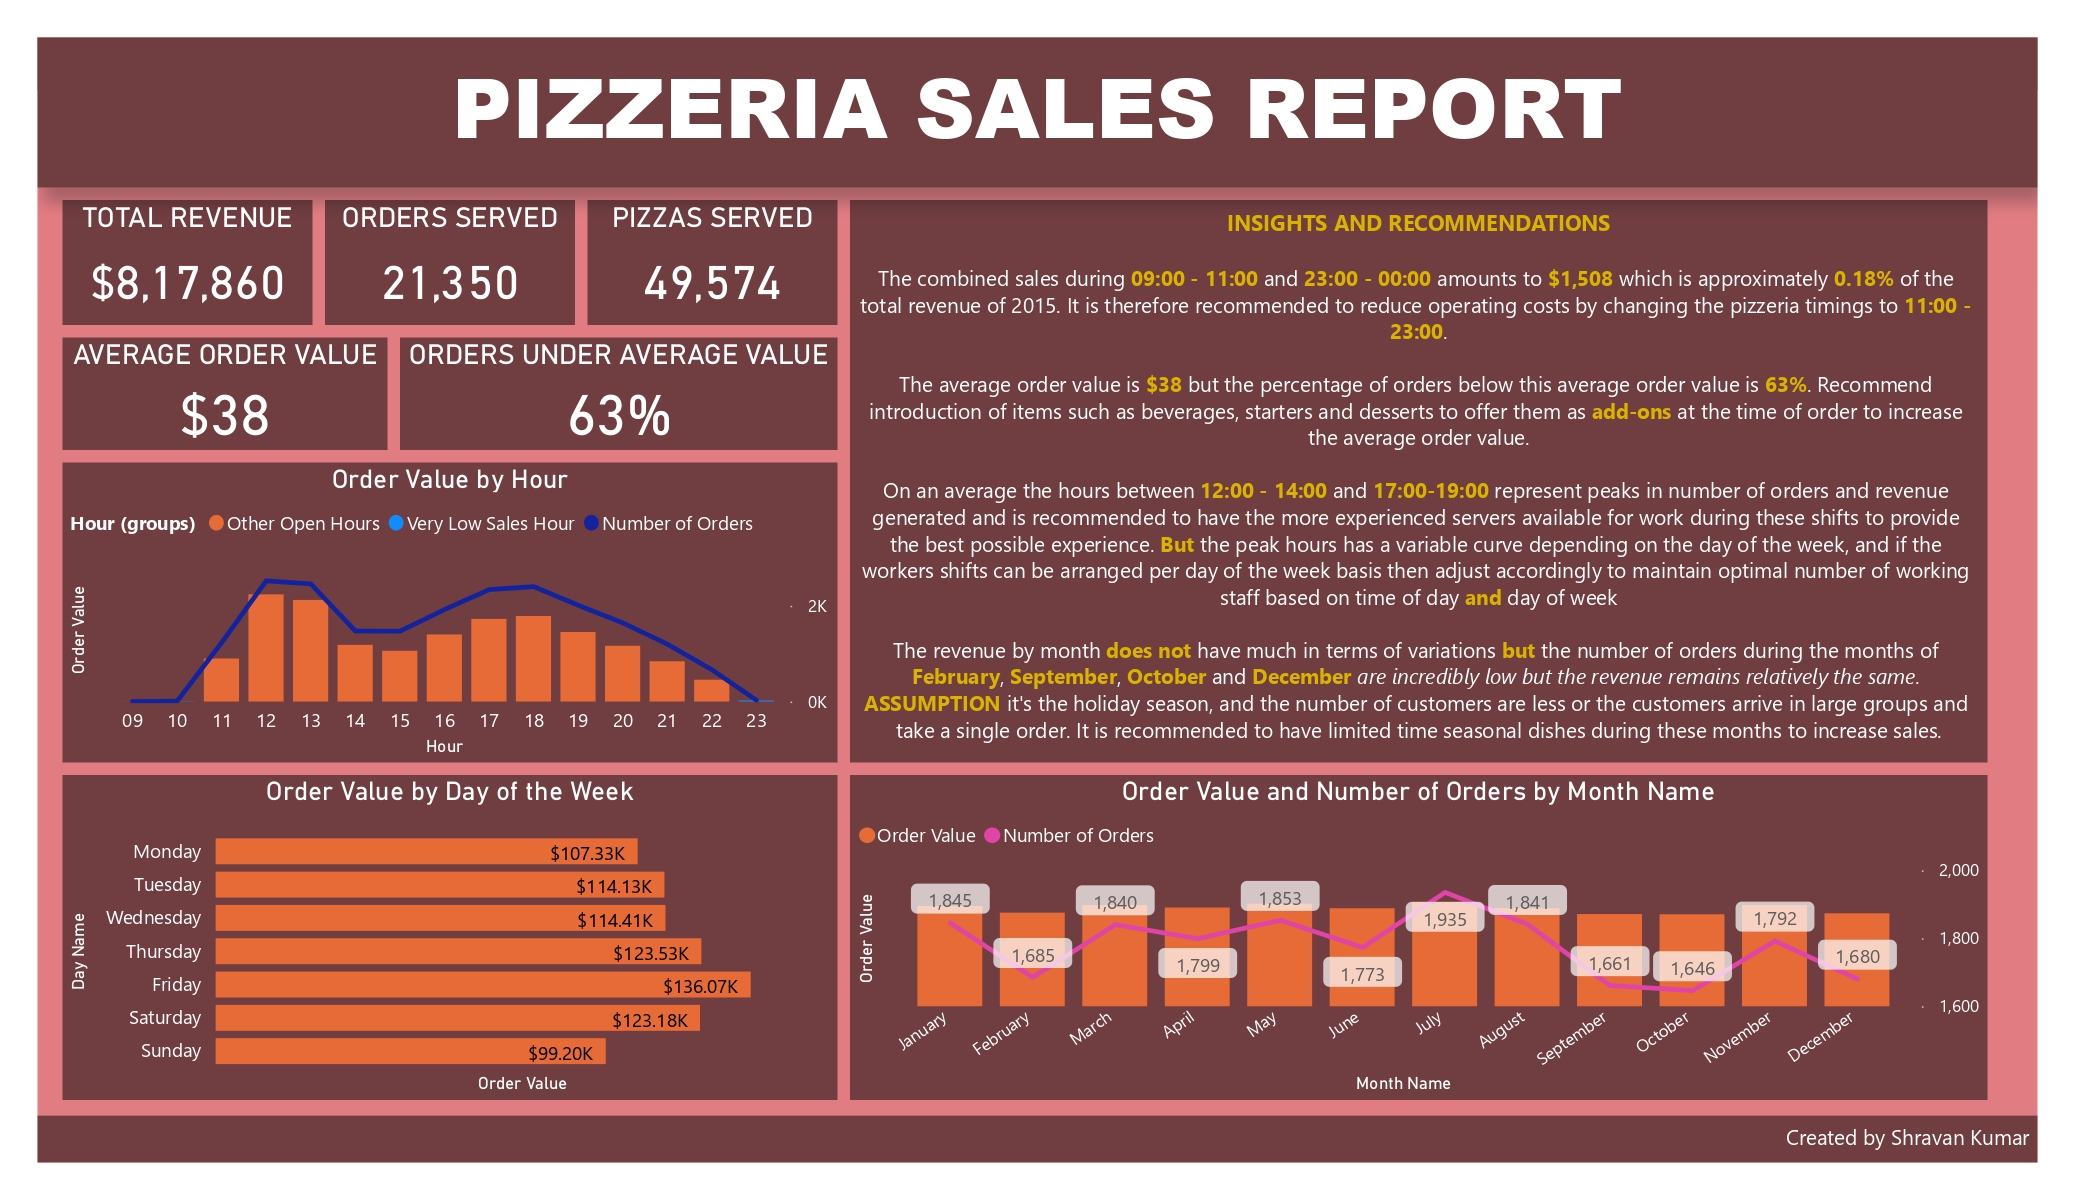

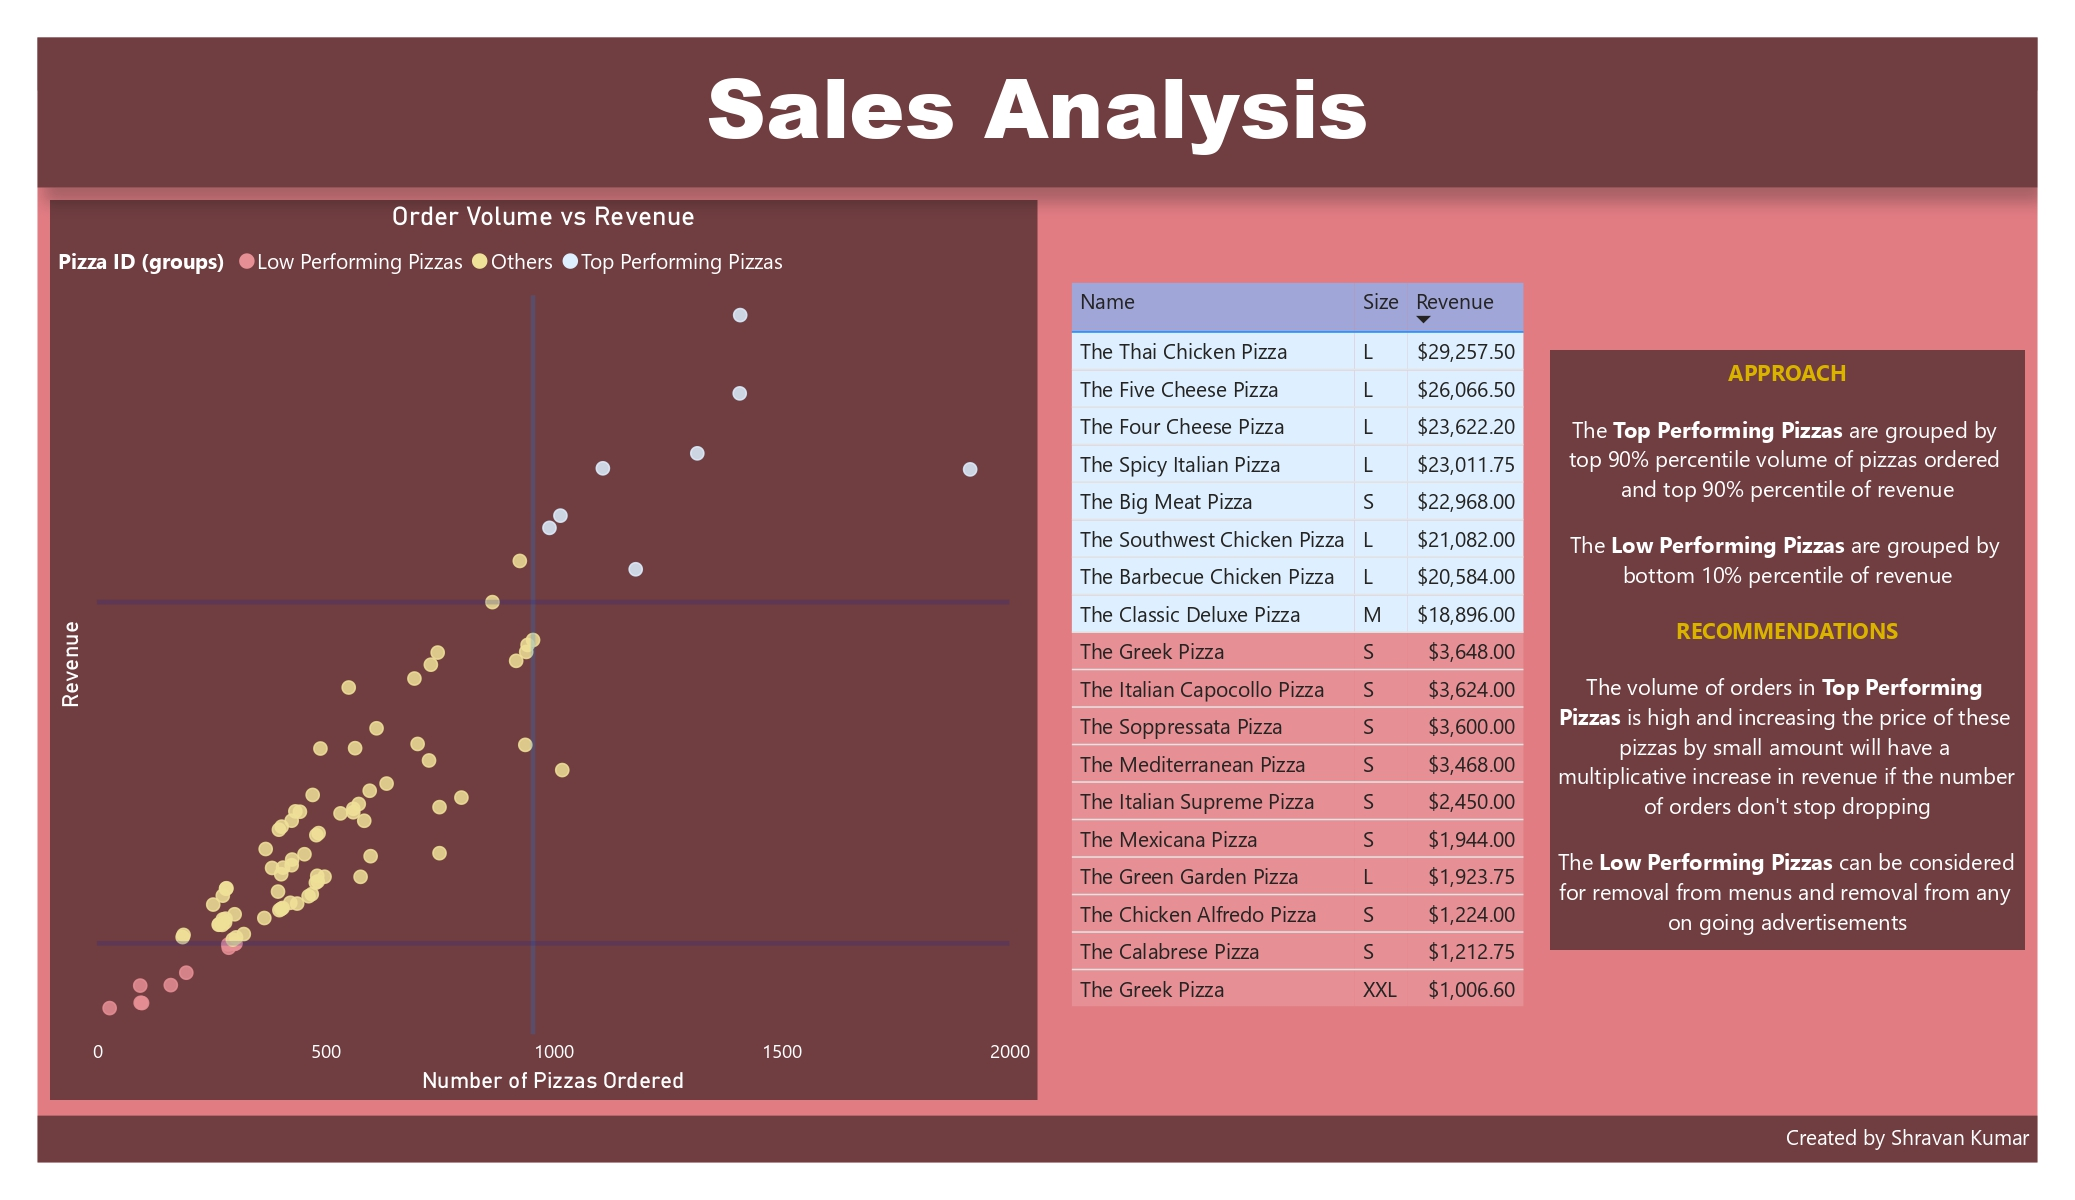

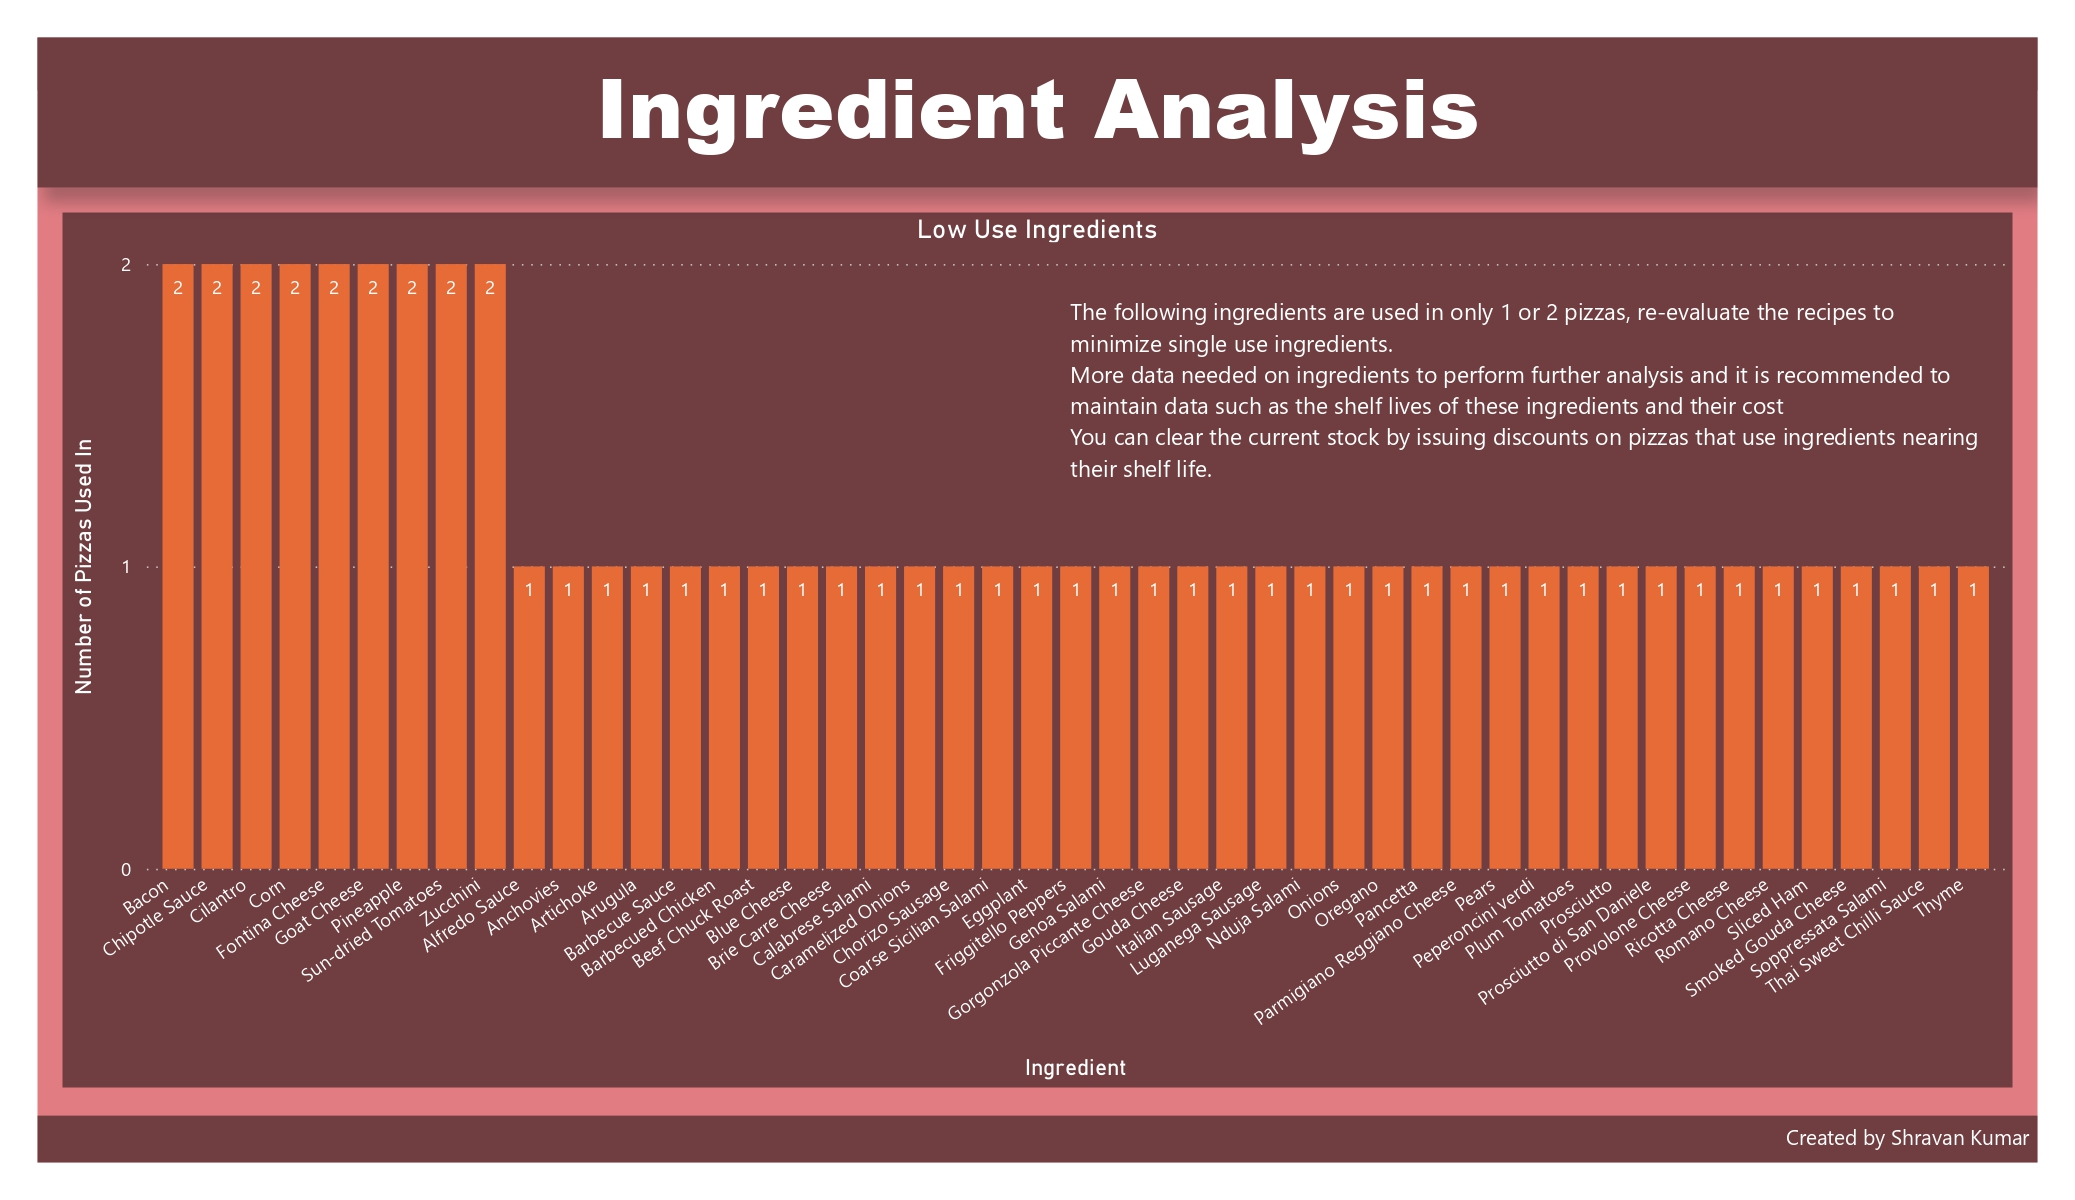

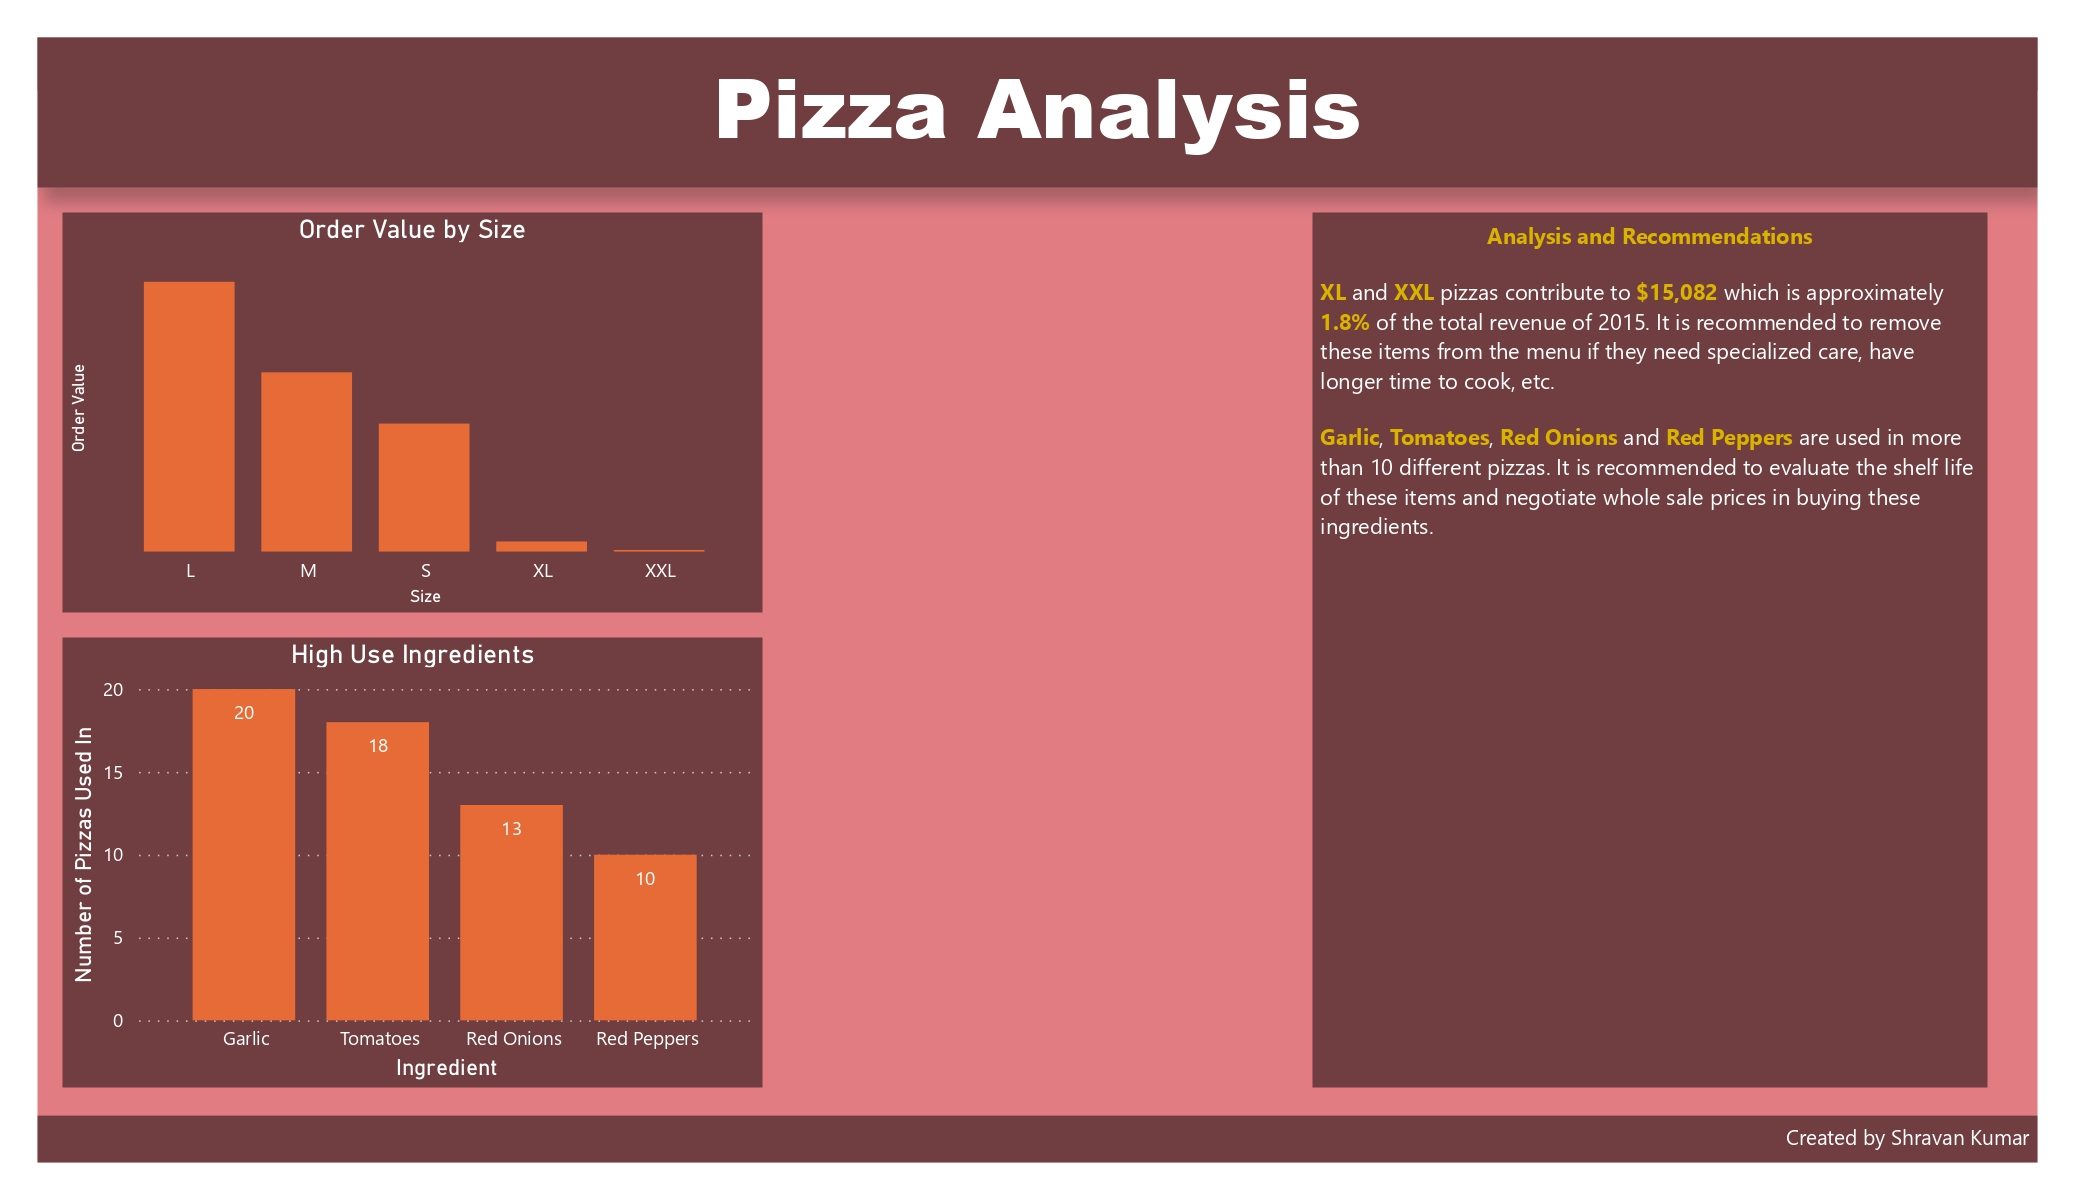